In [358]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [296]:
tr=cv2.imread('./eq_tri.jpg')
sq=cv2.imread('./sq.jpg')

In [278]:
def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize':(ksize, ksize), 'sigma':1.0, 'theta':theta, 'lambd':15.0,
                  'gamma':0.02, 'psi':0, 'ktype':cv2.CV_32F}
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern,params))
    return filters

def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)
    for kern,params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum


#main
filters = build_filters()
p = process(im, filters)

In [437]:
kernel = cv2.getGaborKernel((21, 21), 20, 60, 15, 4, 1, cv2.CV_32F)
filtered = cv2.filter2D(sq, -1, kernel)
image=np.array(filtered)
print(image.sum())

4401354


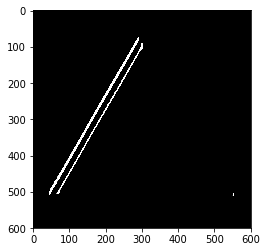

In [436]:
1518630
plt.imshow(filtered)

In [384]:
image.sum()

1632438

In [390]:
tr_angles=[60,-60,90]
sq_angles=[0,90]

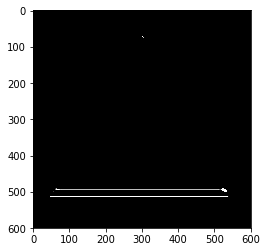

In [391]:
for an in tr_angles:
    kernel = cv2.getGaborKernel((21, 21), 20, 90, 15, 7, 0, cv2.CV_32F)
    filtered = cv2.filter2D(tr, -1, kernel)
    image=np.array(filtered)
    plt.imshow(filtered)